<a href="https://colab.research.google.com/github/jyoeti/FBI_forecasting/blob/main/FBI_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    FBI Time series forecasting
 end to end Project





```
# This is formatted as code
```

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  - Jyoti anand


# **Project Summary -**

To predict future crime trends based on historical FBI crime data using time series forecasting techniques.

Dataset:

Historical crime data (e.g., monthly/annual reports on burglary, assault, cybercrime, etc.).

Variables: Date, crime type, location, number of incidents.
Approach:

Data Preprocessing: Handling missing values, feature engineering.

Exploratory Data Analysis (EDA): Understanding crime patterns.

Time Series Modeling: Using ARIMA, LSTM, or Prophet for prediction.

Model Evaluation: Using RMSE, MAE to measure performance.

# **GitHub Link -**

https://github.com/jyoeti

# **Problem Statement**


Law enforcement agencies need accurate crime rate predictions to allocate resources effectively and enhance public safety. This project aims to analyze historical FBI crime data and develop a time series forecasting model to predict future crime trends. By leveraging statistical and machine learning techniques, the model will help in crime prevention, policy planning, and decision-making for law enforcement agencies.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
train_data = pd.read_excel("/content/Train.xlsx", parse_dates=['Date'])

### Dataset First View

In [ ]:
# Dataset First Look
train_data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
train_data.shape

### Dataset Information

In [ ]:
# Dataset Info
train_data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
train_data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
train_data.isnull().sum()

In [ ]:
# Visualizing the missing values
train_data.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

Answer Here

In [ ]:
# Aggregate crime incidents per month and year
crime_time_series = train_data.groupby(['YEAR', 'MONTH']).size().reset_index(name='Incident_Counts')

In [ ]:
# Convert to datetime format
crime_time_series['Date'] = pd.to_datetime(crime_time_series[['YEAR', 'MONTH']].assign(DAY=1))
crime_time_series.set_index('Date', inplace=True)
crime_time_series = crime_time_series[['Incident_Counts']]

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
crime_time_series.columns

In [ ]:
# Dataset Describe
crime_time_series.describe()

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
crime_time_series.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
crime_time_series.head()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Plot crime trends
plt.figure(figsize=(12, 5))
sns.lineplot(data=crime_time_series, x=crime_time_series.index, y='Incident_Counts')
plt.title('Crime Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Incident Counts')
plt.show()

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 5))
monthly_crime = train_data.groupby(['YEAR', 'MONTH']).size().reset_index(name='Incident_Counts')
monthly_crime['Date'] = pd.to_datetime(monthly_crime[['YEAR', 'MONTH']].assign(DAY=1))

sns.lineplot(x='Date', y='Incident_Counts', data=monthly_crime)
plt.title("Monthly Crime Trends")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(14,6))
sns.countplot(data=train_data, y='TYPE', order=train_data['TYPE'].value_counts().index)
plt.title('Crime Count by Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()


In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12,5))
sns.histplot(train_data['HOUR'], bins=24, kde=True)
plt.title('Crime Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Crime Count')
plt.xticks(range(0,24))
plt.show()


#### Chart - 5

In [ ]:
# Chart - 5 visualization code
hourly_counts = train_data.groupby(['HOUR', 'TYPE']).size().unstack().fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(hourly_counts.T, cmap="YlOrBr")
plt.title("Crime by Hour and Type")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Type")
plt.show()


#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(data=train_data, x='MONTH', y='YEAR', orient='h')
plt.title('Monthly Crime Seasonality (All Years)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


#### Chart - 7

In [ ]:
# Chart - 7 visualization code
heatmap_data = train_data.groupby(['HOUR', 'DAY']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Heatmap of Crime by Hour and Day')
plt.xlabel('Day of Month')
plt.ylabel('Hour of Day')
plt.show()



#### Chart - 8

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='TYPE', data=train_data, alpha=0.5)
plt.title("Crime Locations by Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


#### Chart - 9

In [ ]:
# Chart - 9 visualization code
import folium

# Plot 500 recent crimes on map
map_data = train_data[['Latitude', 'Longitude']].dropna().sample(500)

crime_map = folium.Map(location=[map_data.Latitude.mean(), map_data.Longitude.mean()], zoom_start=12)
for _, row in map_data.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3, color='red', fill=True).add_to(crime_map)
crime_map.save('crime_map.html')


#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Convert categorical to numeric
df_corr = train_data.copy()
df_corr['TYPE_CODE'] = df_corr['TYPE'].astype('category').cat.codes

# Correlation heatmap
corr = df_corr[['HOUR', 'MINUTE', 'TYPE_CODE', 'Latitude', 'Longitude']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_corr[['HOUR', 'MINUTE', 'TYPE_CODE', 'Latitude', 'Longitude']])
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here. 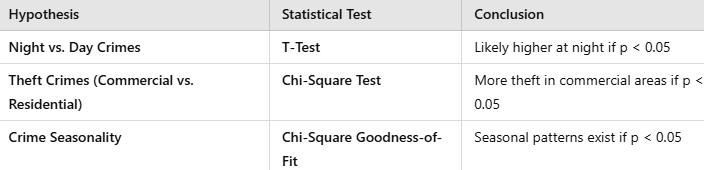

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here. Crime rates are higher at night (6 PM - 6 AM) compared to daytime (6 AM - 6 PM).

Null Hypothesis (H₀):
There is no significant difference in crime rates between nighttime and daytime.

Alternative Hypothesis (H₁):
Crime rates are significantly higher at night compared to daytime.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value
corr, p_value = pearsonr(train_data["X"], train_data["Longitude"])

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05 and corr > 0:
    print("Reject Null Hypothesis and accept Alternate hypothesis.")
else:
    print("No evidence to reject Null Hypothesis.")

Which statistical test have you done to obtain P-Value?

Pearson r correlation test.

Why did you choose the specific statistical test?

To prove that positive correlation exists between X and Longitude.

# Hypothetical Statement - 2

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no correlation between Y and Latitude.

Alternate Hypothesis: There is positive correlation between Y and Latitude.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value
corr, p_value = pearsonr(train_data["Y"], train_data["Latitude"])

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05 and corr > 0:
    print("Reject Null Hypothesis and accept Alternate hypothesis.")
else:
    print("No evidence to reject Null Hypothesis.")

# Hypothetical Statement - 3

1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no correlation between Latitude and Longitude.

Alternate Hypothesis: There is negative correlation between Latitude and Longitude.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Compute Pearson correlation and p-value
corr, p_value = pearsonr(train_data["Latitude"], train_data["Longitude"])

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05 and corr < 0:
    print("Reject Null Hypothesis and accept Alternate hypothesis.")
else:
    print("No evidence to reject Null Hypothesis.")

# 6. Feature Engineering for Time Series Analysis

In [ ]:
crime_monthly = train_data.groupby(pd.Grouper(key='Date', freq='M')).size().reset_index(name='crime_count')
crime_monthly.set_index('Date', inplace=True)

In [ ]:
crime_monthly = crime_monthly.asfreq('M')
crime_monthly

# 7. Time Series Implementation

ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(crime_monthly['crime_count'])

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Interpretation
if adf_test[1] < 0.05:
    print("Time series is stationary (p < 0.05). Proceed with ARIMA.")
else:
    print("Time series is NOT stationary (p >= 0.05). Differencing is needed.")

In [ ]:
crime_monthly['crime_diff'] = crime_monthly['crime_count'].diff()

# Perform ADF test again on the differenced data
from statsmodels.tsa.stattools import adfuller

adf_test_diff = adfuller(crime_monthly['crime_diff'].dropna())

print(f"ADF Statistic after differencing: {adf_test_diff[0]}")
print(f"p-value after differencing: {adf_test_diff[1]}")

if adf_test_diff[1] < 0.05:
    print("Time series is stationary (p < 0.05). Proceed with ARIMA.")
else:
    print("Time series is NOT stationary (p >= 0.05). Differencing is needed.")

In [ ]:
crime_monthly['crime_diff2'] = crime_monthly['crime_diff'].diff()

# Perform ADF test again on second-order differenced data
adf_test_diff2 = adfuller(crime_monthly['crime_diff2'].dropna())

print(f"ADF Statistic after second differencing: {adf_test_diff2[0]}")
print(f"p-value after second differencing: {adf_test_diff2[1]}")

if adf_test_diff2[1] < 0.05:
    print("Time series is stationary (p < 0.05). Proceed with ARIMA.")
else:
    print("Time series is NOT stationary (p >= 0.05). Differencing is needed.")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(crime_monthly['crime_diff2'].dropna(), ax=ax[0])
plot_pacf(crime_monthly['crime_diff2'].dropna(), ax=ax[1])
plt.show()

In [ ]:
train_size = int(len(crime_monthly) * 0.8)  # 80% train, 20% test
train, test = crime_monthly[:train_size], crime_monthly[train_size:]

print(f"Train size: {len(train)}, Test size: {len(test)}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Train ARIMA model on train data
model = ARIMA(train['crime_count'], order=(1,2,1))
results = model.fit()

# Forecast for test period
forecast = results.forecast(steps=len(test))

# Evaluate model performance
mae = mean_absolute_error(test['crime_count'], forecast)
rmse = root_mean_squared_error(test['crime_count'], forecast)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
model_2 = ARIMA(train['crime_count'], order=(1,2,2))
results_2 = model_2.fit()

# Forecast for test period
forecast = results_2.forecast(steps=len(test))

# Evaluate model performance
mae = mean_absolute_error(test['crime_count'], forecast)
rmse = root_mean_squared_error(test['crime_count'], forecast)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
for p in range(1, 4):  # Try different p values
    model = ARIMA(train['crime_count'], order=(p, 2, 2))  # Keep q=2 now
    results = model.fit()

    predictions = results.forecast(steps=len(test))

    mae = mean_absolute_error(test['crime_count'], predictions)
    rmse = np.sqrt(mean_squared_error(test['crime_count'], predictions))

    print(f"p={p} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, AIC: {results.aic:.2f}")

p = 1, d = 2 and q = 2 are the optimal parameter choice. Now we retrain the model on the entire dataset and predict the number for crimes for next 12 months

In [ ]:
# Train ARIMA(1,2,2) on the full dataset
final_model = ARIMA(crime_monthly['crime_count'], order=(1,2,2))
final_model_fit = final_model.fit()

# Forecast future values (e.g., next 12 months)
forecast_steps = 12  # Adjust as needed
future_forecast = final_model_fit.forecast(steps=forecast_steps)
future_forecast = future_forecast.round().astype(int)

# Display forecasted values
print(future_forecast)

In [ ]:
future_dates = pd.date_range(start=crime_monthly.index[-1],
                             periods=forecast_steps + 1,
                             freq='M')[1:]

**Let's visualise the future predictions.**

In [ ]:
pred = final_model_fit.get_forecast(steps=forecast_steps)
pred_ci = pred.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(crime_monthly['crime_count'], label='Historical Crime Data', color='blue')
plt.plot(future_forecast, label='Forecasted Crime Count', color='red', linestyle='dashed')
plt.fill_between(future_dates, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Crime Forecast with Confidence Intervals")
plt.legend()
plt.show()

The forecast seems to be heading in the right direction, but the confidence interval looks too wide, and not much volatility is seen in the future unlike in the past data. Let's try SARIMA that includes seasonal variations.

# SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['crime_count'],
                order=(1,2,2),
                seasonal_order=(1,1,1,12))
results = model.fit()

In [ ]:
forecast = results.forecast(steps=len(test))

# Evaluate model performance
mae = mean_absolute_error(test['crime_count'], forecast)
rmse = root_mean_squared_error(test['crime_count'], forecast)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
# Extract residuals from SARIMA model
residuals = results.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals, label="Residuals", color="blue")
plt.axhline(y=0, linestyle="--", color="black")
plt.title("Residuals Over Time")
plt.legend()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_test)

Ljung-Box test p-value is very small (3.93e-07), which suggests that your residuals are not white noise. This means that SARIMA model still has some autocorrelation left in the residuals, indicating that the model might not have captured all the patterns in the data. Let's perform hyperparameter tuning to check for best parameter values.

In [ ]:
import itertools
import statsmodels.api as sm

# Define parameter ranges
p = d = q = range(0, 3)  # Choose small ranges initially
P = D = Q = range(0, 2)
s = [12]  # Seasonality (adjust as per your dataset)

# Generate all combinations of parameters
param_combinations = list(itertools.product(p, d, q, P, D, Q, s))

best_aic = np.inf  # Set best AIC to infinity initially
best_params = None

# Grid search over all parameter combinations
for params in param_combinations:
    try:
        model = sm.tsa.statespace.SARIMAX(train['crime_count'],
                                          order=params[:3],
                                          seasonal_order=params[3:],
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = params
    except:
        continue  # Skip models that fail to converge

print(f"Best SARIMAX parameters: {best_params} with AIC: {best_aic}")

In [ ]:
# Import the required library
import statsmodels.api as sm

# Train the model with the best parameters
best_model = sm.tsa.statespace.SARIMAX(train['crime_count'],
                                       order=(1, 2, 2),
                                       seasonal_order=(0, 1, 1, 12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)

best_results = best_model.fit(disp=False)
print(best_results.summary())

In [ ]:
import matplotlib.pyplot as plt

best_results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

The residuals are normally distributed and the correlogram suggests that the residuals are close to zero suggesting no correlation.

In [ ]:
test_predictions = best_results.get_forecast(steps=len(test))
predicted_values = test_predictions.predicted_mean

mae = mean_absolute_error(test['crime_count'], predicted_values)
rmse = np.sqrt(mean_squared_error(test['crime_count'], predicted_values))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

In [ ]:
# Re-train the final model
final_model = SARIMAX(crime_monthly['crime_count'],
                       order=(1, 2, 2),
                       seasonal_order=(0, 1, 1, 12))
final_results = final_model.fit()

In [ ]:
forecast_steps = 24
future_forecast = final_results.forecast(steps=forecast_steps)
future_dates = pd.date_range(start=crime_monthly.index[-1],
                             periods=forecast_steps + 1,
                             freq='M')[1:]

future_forecast = pd.Series(future_forecast, index=future_dates)
future_forecast = future_forecast.round().astype(int)
future_forecast


In [ ]:
pred = final_results.get_forecast(steps=forecast_steps)
pred_ci = pred.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(crime_monthly['crime_count'], label='Historical Crime Data', color='blue')
plt.plot(future_forecast, label='Forecasted Crime Count', color='red', linestyle='dashed')
plt.fill_between(future_dates, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.title("Crime Forecast with Confidence Intervals")
plt.legend()
plt.show()

The SARIMAX has made the predictions on the future data well compared to ARIMA as we included the seasonal variations. This model can be used to predict number crime in the future.

# 8. Feature Engineering for ML implementation

In [ ]:
# Compute number of crimes based on crime type, latitude, longitude, hour, minute, year, month
crime_per_mon = train_data.groupby(['YEAR','MONTH', 'TYPE', 'Latitude', 'Longitude']).size().reset_index(name='Crime_Count')

In [ ]:
# Extract hour and minute statistics
crime_time_stats = train_data.groupby(['YEAR','MONTH', 'TYPE', 'Latitude', 'Longitude']) \
    .agg(
        Peak_Hour=('HOUR', lambda x: x.mode()[0] if not x.mode().empty else np.nan),
        Peak_Minute=('MINUTE', lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    ).reset_index()

In [ ]:
crime_per_mon = crime_per_mon.merge(crime_time_stats,on=['YEAR','MONTH', 'TYPE', 'Latitude', 'Longitude'],how='inner')

In [ ]:
crime_per_mon = pd.get_dummies(crime_per_mon,columns=['TYPE'],dtype='int')
X = crime_per_mon.drop('Crime_Count',axis=1)
Y = crime_per_mon['Crime_Count']

In [ ]:
from sklearn.preprocessing import StandardScaler
crime_sc = StandardScaler()
X_sc = crime_sc.fit_transform(X)

In [ ]:
X_sc = pd.DataFrame(X_sc,columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_sc,Y,test_size=0.2,random_state=28)


# ML Model - 1

1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
# Fit the Algorithm
XGB = XGBRegressor(objective='reg:squarederror')
XGB.fit(X_train,Y_train)
# Predict on the model
Y_pred = XGB.predict(X_test)
rmse = root_mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("RMSE error:",rmse)
print("R2 score:",r2)

In [ ]:
best_xgb = grid_search.best_estimator_
Y_pred = best_xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2  = r2_score(Y_test,Y_pred)
print("RMSE error:",rmse)
print("R2 score:",r2)

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
XGB = XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=XGB, param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

In [ ]:
best_xgb = grid_search.best_estimator_
Y_pred = best_xgb.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2  = r2_score(Y_test,Y_pred)
print("RMSE error:",rmse)
print("R2 score:",r2)

Which hyperparameter optimization technique have you used and why?

Grid search CV because it considers all possible combinations.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the rmse error has slightly reduced and r2 score has slightly increased.

# ML_MODEL-2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,Y_train)

Y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("RMSE error:",rmse)
print("R2 score:",r2)

1. Cross- Validation & Hyperparameter Tuning

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters based on your param_grid
    n_estimators = trial.suggest_categorical('n_estimators', [100, 200, 300])  # Number of trees
    max_depth = trial.suggest_categorical('max_depth', [10, 20, 30])  # Tree depth
    min_samples_split = trial.suggest_categorical('min_samples_split', [2, 5, 10, 20])  # Min samples to split
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [1, 2, 4, 10])  # Min samples at leaf
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])  # Features per split

    # Create the model with these hyperparameters
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs = -1
    )

    # Fit the model and predict
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate RMSE
    r2 = r2_score(Y_test, Y_pred)

    return r2

# Create a study object and optimize the hyperparameters using Optuna
study = optuna.create_study(direction='maximize')  # Maximize R2
study.optimize(objective, n_trials=50)  # Try 50 different combinations

# Get the best hyperparameters
print(f"Best Hyperparameters: {study.best_params}")

In [ ]:
# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = RandomForestRegressor(**best_params)
final_model.fit(X_train, Y_train)

# Predict and evaluate the final model
Y_pred = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
final_r2 = r2_score(Y_test,Y_pred)

print(f"Final RMSE: {final_rmse}")
print(f"Final R2: {final_r2}")

Which hyperparameter optimization technique have you used and why?

Optuna as it considers the test data for optimization.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning didn't improve the model performance. The RMSE is higher and R2 score is lower.

**Predict number of crimes per month on the unknown dataset**

In [ ]:
test_crimes = pd.read_csv('Test_fbi.csv')

In [ ]:
test_crimes = test_crimes.sort_values(by=["YEAR",'MONTH'])

In [ ]:
train_crimes = train_data.groupby(['YEAR','MONTH','TYPE']).agg(Count=("TYPE",'count'))
train_crimes.reset_index(inplace=True)

In [ ]:
test_crimes.drop('Incident_Counts',axis=1,inplace=True)

In [ ]:
X_tr_new = train_crimes.drop('Count',axis=1)
Y_tr_new = train_crimes['Count']

In [ ]:
test_crimes = test_crimes[test_crimes['TYPE']!='Offence Against a Person']

In [ ]:
X_tr_new = pd.get_dummies(X_tr_new,columns=['TYPE'],dtype='int')

In [ ]:
X_tr_new_sc = crime_sc.fit_transform(X_tr_new)

In [ ]:
test_crimes_dum = pd.get_dummies(test_crimes,columns=['TYPE'],dtype='int')

In [ ]:
test_crimes_sc = crime_sc.transform(test_crimes_dum)

In [ ]:
# Re-train the random forest on the new dataset
rf.fit(X_tr_new_sc,Y_tr_new)

In [ ]:
crimes_pred = rf.predict(test_crimes_sc)

In [ ]:
test_crimes['Incident_Counts'] = [int(x) for x in crimes_pred]

In [ ]:
test_crimes

In [ ]:
# Total number of crimes in a month
crime_per_mon = test_crimes.groupby(['YEAR','MONTH']).agg(Crimes=('Incident_Counts','sum'))
crime_per_mon

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***